# The Perceptron:

To get started, let's look at a type of artificial neuron called the perceptron. Perceptrons were developed in the 1950s by the scientist Frank Rosenblatt, inspired by earlier work of Warren McCulloch and Walter Pitts. Today, it's more common to use other models of artificial neurons, the main neuron model being used is called the sigmoid neuron. We'll be discussing sigmoid neurons shortly. Let's delve into the functioning of a perceptron in detail.

So a perceptron works by taking several binary inputs and produces a single binary output. Let's consider an example where the perceptron takes 3 binary inputs $x_1,\; x_2,\; x_3$. In general, it could have more or fewer inputs.
$$
\left[
\begin{matrix}
[x_1]\\
[x_2]\\
[x_3]
\end{matrix}
\right]
=====> [\text {perceptron}] =====> \text{output}
$$

Rosenblatt proposed a simple rule to compute the output. He introduced <I>weights</I>, $w_1, w_2, \dots,$ real numbers expressing the importance of the respective inputs to the outputs. The neuron's output, 0 or 1, is determined by whether the weighted sum of the inputs: $\sum_jw_jx_j$ is less than or greater than some <I><b>threshold value</b></I>. Just like weights, the threshold is a real number which is a parameter of the neuron. To put it in more precise algebraic terms:
$$
    \text{output} =\begin{cases} 0, \;if \;\sum_jw_jx_j \leq threshold\\
            1, \;if \;\sum_jw_jx_j > threshold
            \end{cases}
$$         
That's the basic mathematical model. A way we can think about the perceptron is that it's a device that makes decision by weighing up evidence. Let's consider an example which is a simple one. Suppose the weekend is coming up, and you've heard that there is going to be a food festival in your city. You're a foodie and are trying to decide whether or not to go to the festival. You might make up your decision by weighing up 3 factors:
1. Is the weather good?
2. Does your boyfriend or girlfriend want to accompany you?
3. Is the festival near public transit? (You don't own a car)

We can represent these 3 factors by the corresponding binary variables $x_1, x_2$ and $x_3$. For instance, we'll have $x_1 = 1$ if the weather is good and $x_1 = 0$ if the weather is bad. Similarly, $x_2 = 1$ if your boyfriend or girlfriend wants to join you, and 0 otherwise. And similarly again for $x_3$ and public transit.

Now, suppose you're a foodie and you want to go to the festival, so much so that you're happy to go to the festival even if your boyfriend or girlfriend is uninterested and the festival is hard to get to. But perhaps you really loathe bad weather, and there is no way you will go to the festival if the weather is bad. One way to represent this mathematically is to choose $w_1 = 6$ for the weather, $w_2 = 2$ and $w_3 = 2$ for the other conditions. The larger value of $w_1$ indicates that the weather matters a lot to you. Finally, suppose you choose a threshold of $5$ for the perceptron. With these choices, the perceptron implements the desired decision-making model, outputting 1 whenever the weather is good and 0 whenever the weather is bad. It makes no difference to the output, whether your boyfriend or girlfriend wants to go, or whether the public transit is nearby.

By varying the weights and the threshold we can get different models of decision-making. For example, suppose we instead chose a threshold of $3$. Then the perceptron would decide that you should go to the festival whenever the weather was good or when both the festival was near public transit and your boyfriend or girlfriend was willing to join you.

Let's simplify the way we describe perceptrons. The condition $\sum_jw_jx_j > threshold$ is cumbersome, and we can make two notational changes to simplify it. The first is to write $\sum_jw_jx_j$ as a dot product $w\cdot x = \sum_jw_jx_j$, where $w$ and $x$ are vectors whose componenets are the weights and inputs, respectively. The second change is to move the threshold on the other side of the inequality, and to replace it by what's known as perceptron's bias, $b \equiv -threshold$. Using the bias instead of the threshold, the perceptron rule can be rewritten:
$$
    output =\begin{cases} 0,\; if\; w\cdot x + b \leq 0\\
           1,\; if \;w\cdot x + b > 0
           \end{cases}
$$
           
In more of biological terms we can think of bias as a measure of how easy it is to get the perceptron to fire. For a perceptron with a really big bias, it is extremely easy for the perceptron to output a 1.

# Sigmoid Neurons:

Suppose we have a perceptron that we would like to use to learn to solve a problem. For example, we want to predict the value of a certain variable based on the inputs. And we'd like the network to learn weights and biases so that the output from the network correctly predicts the values. To see how learning might work, suppose we make a small change in a weight in the network. What we'd like is for this small change in the weight (or bias) to cause only a small corresponding change in the output from the network.

However, this is not the case with a perceptron. In fact, a small change in the weights or bias of a perceptron can sometimes cause the output of that perceptron to completely flip, say from 0 to 1. This makes it difficult to see how to gradually modify the weights and biases so that the network gets closer to the desired behaviour. Perhaps there's some clever way of getting around this problem.

We can overcome this problem by introducing a new type of artificial neuron called the <I><b>sigmoid neuron</b></I>. Sigmoid neurons are similar to perceptrons, but modified so that small changes in their weights and bias cause ony a small change in their output. That's a crucial fact which will allow our perceptron to learn.

Just like a perceptron the sigmoid neuron has inputs $x_1, x_2, \dots$. But instead of being just 0 or 1, these inputs can also take on any values between 0 and 1. So, for instance, 0.638 is a valid input for a sigmoid neuron. Also, just like a perceptron, the sigmoid neuron has weights for each input, $w_1, w_2,\dots$, and an overall bias, b. But the output is not 0 or 1. Instead, it's $\sigma(w\cdot x + b)$, where $\sigma$ is called the <I><b>sigmoid function</b></I> and is defined by:
$$
        \sigma(z) \equiv \frac {1}{1+e^-z}
$$

To put it all a little more explicitly, the output of sigmoid neuron with inputs $x1, x2, \dots$, weights $w1, w2, \dots$, and bias $b$ is:
$$
    \frac {1}{1+e^{-\sum_j w_j x_j-b}}
$$

To understand the similarity to the perceptron model, suppose $z \equiv w\cdot x + b$ is a large positive number. Then $e^{-z} \approx 0$ and so $\sigma(z)\approx 1$. In other words, when $z = w\cdot x + b$ is large and positive, the output from the sigmoid neuron is approximately 1, just as it would have been for a perceptron. Suppose on the other hand that $z = w\cdot x + b$ is very negative. Then $e^{-z}\to \infty$, and $\sigma(z)\approx 0$. So when $z = w\cdot x + b$ is very negative, the behaviour of a sigmoid neuron also closely approximates a perceptron. It's only when $w\cdot x + b$ is of modest size that there's much deviation from the perceptron model.

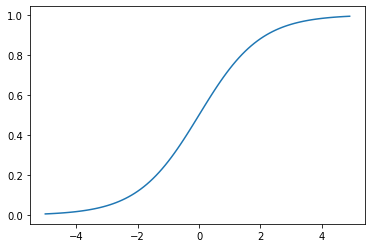

In [2]:
#we'll plot the sigmoid function here
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(z):
    return 1/(1+np.exp(-z))

x = np.arange(-5, 5, 0.1)

plt.plot(x, sigmoid(x))
plt.show()

The smoothness of $\sigma$ means that small changes $\Delta w_j$ in the weights and $\Delta b$ in the bias will produce a small change $\Delta output$ in the output. In fact calculus tells us that the ouput is well approximated by:
$$
    \Delta ouput \approx \sum_j \frac {\partial output}{\partial w_j} \Delta w_j + \frac {\partial ouput}{\partial b} \Delta b
$$
where the sum is over all weights, $w_j$ and $\partial output/\partial w_j$ and $\partial ouput/\partial b$ denote partial derivatives of the output with respect to $w_j$ and $b$, respectively.
The expression above might look complicated, with all the partial derivatives, it is actually saying something really simple: $\Delta output$ is a <I>linear function</I> of the changes $\Delta w_j$ and $\Delta b$ in the weights and bias. This linearity makes it easy to choose small changes in the weights and biases to achieve any desired small change in the output. So while sigmoid neurons have much of the same qualitative behaviour as perceptrons, they make it much easier to figure out how changing the weights and biases will change the output.

** Please do note that I have introduced the sigmoid neuron here itself in order to clarify the functioning of neurons. However, we won't be using the sigmoid neuron in this Linear Regression example. The application of sigmoid neurons will become more clear in the Logistic Regression tutorial.**